In [102]:
%matplotlib inline 
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections.abc import Iterable

In [103]:
def isIterable(x):
    if isinstance(x, Iterable):
        return True
    else:
        return False


def allToList(r):
    i=0
    for x in r:
        if not isIterable(x):
            r[i] = [x]
        i+=1
    return r    


In [104]:
def to_df():
    df = pd.read_csv("archive/games.csv")
    df.drop(["created_at","rated","last_move_at","opening_eco","opening_ply"],axis=1,inplace=True)
    return df

In [105]:

def TopOpeningsByCount(top):
    df = to_df()
    countByOpening = df.groupby("opening_name")["id"].count()
    countByOpening.index = list([x.split()[0] for x in countByOpening.index])
    r = allToList([countByOpening.loc[x] for x in pd.unique(countByOpening.index)])
    idx = pd.unique(countByOpening.index)
    
    countByOpening = pd.Series([sum(l) for l in r],index=idx)
    countByOpening.sort_values(ascending=False,inplace=True)
    
    if top == -1:
        return countByOpening
    else:
        countByOpening = countByOpening[:top]
    return countByOpening


In [106]:
def TopByPercent(top):
    openings = TopOpeningsByCount(-1)
    totalGames = openings.sum()
    
    opening_percents  = openings.apply(lambda x: x/totalGames)
    if top == -1:
        return opening_percents
    else:    
        return opening_percents[:top]

In [107]:
def plot_percents():
    produce_Series()
    top10OpeningsPercent2  = top10percent2.apply(lambda x: x/totalGames)
    ax = sns.barplot(x=top10percent2.index, y=top10percent2)
    # sns.set_context("notebook", font_scale=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
    ax.set(xlabel='Opening name', ylabel='Total count')
    plt.tight_layout()
#     plt.show()
    
    
    

In [113]:
def plot_totals(top):
    top10Openings = TopOpeningsByCount(top)
    ax = sns.barplot(x=top10Openings.index, y=top10Openings)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
    ax.set(xlabel='Opening name', ylabel='Total count')
    plt.tight_layout()
    plt.show()

In [108]:
def plot_percents(top):
    topOpenings = TopByPercent(top)
    ax = sns.barplot(x=topOpenings.index, y=topOpenings)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
    ax.set(xlabel='Opening name', ylabel= '% of games played')
    plt.tight_layout()
    plt.show()

In [109]:
def get_total_and_percent_by_name(name):
    name = name.split()[0]
    count = TopOpeningsByCount(-1)[name]
    percent = TopByPercent(-1)[name]
    return (count,percent)

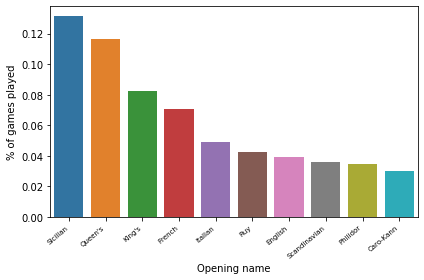

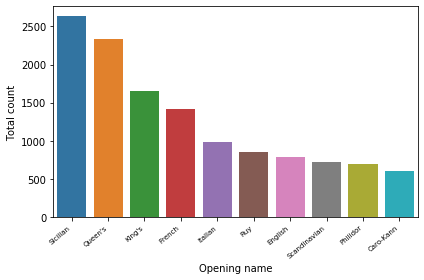

(2632, 0.1312194635556885)

In [116]:
plot_percents(10)
plot_totals(10)
get_total_and_percent_by_name("Sicilian")
